In [2]:
# generate info about mobile sites from mobile ID for both SANBS and Vitalant
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("../1_data/private/SANBSdata.csv", error_bad_lines=False)
#df=pd.read_csv("../1_data/private/VitalantData.csv")

/tmp/ipykernel_1301606/280045915.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("../1_data/private/SANBSdata.csv", error_bad_lines=False)
/tmp/ipykernel_1301606/280045915.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("../1_data/private/SANBSdata.csv", error_bad_lines=False)


In [4]:
## for SANBS

# look at mobile ID to see the number of times a year it is visited 
#filter unique dates - some go for 2 or 3 consectutive days
df.drop(df[df['Visit_Date'].isna()].index, inplace=True) #remove any missing visit dates

df["Visit_Date"] = df["Visit_Date"].astype("datetime64") #convert to date time object

df.sort_values(by=['DonorID', 'don_Sequence', 'Visit_Date'], axis = 0, inplace=True)
df.drop(df[(df['Fixed']== 'Lapsed Clinic') | (df['Fixed']=='Processing Lab')| (df['Fixed']=='Unallocated') 
           | (df["Fixed"]== 'Laboratorium') |(df["Fixed"]=='Doctor')].index, inplace=True)

df['Fixed_mobile'] = np.where(df['Fixed'] == 'Mobile Clinic', 0, 1) #mobile is 0, fixed is 1

df['Year']= df['Visit_Date'].dt.strftime('%Y')
df['Year']=df.Year.astype('int32')
df_2022=df.loc[df['Year'] == 2022]
df_2022_m=df_2022.loc[df_2022.Fixed_mobile==0]
df_mID=df_2022_m.groupby("MobileID")["Visit_Date"].apply(list)
df_mID = pd.DataFrame({'MobileID': df_mID.index, 'Dates': df_mID.values})
df_mID["Counts"]=df_mID['Dates'].apply(lambda x: len(np.unique(x)))
df_mID["Dates"]=df_mID['Dates'].apply(lambda x: np.unique(x))
df_mID["Dates"]=df_mID['Dates'].apply(lambda x: sorted(x))

df_mID.head(25)

/tmp/ipykernel_1301606/588179185.py:7: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df["Visit_Date"] = df["Visit_Date"].astype("datetime64") #convert to date time object


,MobileID,Dates,Counts
0,EEE002,[2022-05-11 00:00:00],1
1,EEE003,"[2022-02-18 00:00:00, 2022-02-21 00:00:00, 202...",6
2,EEE004,"[2022-02-23 00:00:00, 2022-05-04 00:00:00, 202...",4
3,EEE005,"[2022-02-23 00:00:00, 2022-05-04 00:00:00, 202...",4
4,EEE007,"[2022-02-22 00:00:00, 2022-04-26 00:00:00, 202...",5
5,EEE008,"[2022-01-14 00:00:00, 2022-02-11 00:00:00, 202...",12
6,EEE009,"[2022-01-28 00:00:00, 2022-02-25 00:00:00, 202...",11
7,EEE010,"[2022-01-18 00:00:00, 2022-03-29 00:00:00, 202...",5
8,EEE011,"[2022-02-22 00:00:00, 2022-04-26 00:00:00, 202...",5
9,EEE012,"[2022-02-14 00:00:00, 2022-04-11 00:00:00, 202...",5


In [5]:
# iterate through rows keep unique date that do not occur with one or two day of each other to determine frequency of drive
for row in df_mID.itertuples(name='ID'):
    last = 0
    for date in row.Dates:
        if last==0:
            last=date
            continue
        else:
            duration = date - last          
            days  = duration.days 
            last=date
            if days < 2:
                row.Dates.remove(date)
        

In [6]:
df_mID["Counts"]=df_mID['Dates'].apply(lambda x: len(x))
df_mID.head()


,MobileID,Dates,Counts
0,EEE002,[2022-05-11 00:00:00],1
1,EEE003,"[2022-02-18 00:00:00, 2022-02-21 00:00:00, 202...",6
2,EEE004,"[2022-02-23 00:00:00, 2022-05-04 00:00:00, 202...",4
3,EEE005,"[2022-02-23 00:00:00, 2022-05-04 00:00:00, 202...",4
4,EEE007,"[2022-02-22 00:00:00, 2022-04-26 00:00:00, 202...",5


In [7]:
df_mID.loc[df_mID.Counts>200]

,MobileID,Dates,Counts
55,EEE078,"[2022-01-02 00:00:00, 2022-01-04 00:00:00, 202...",208
1915,GEE147,"[2022-01-02 00:00:00, 2022-01-04 00:00:00, 202...",222
2652,GKE080,"[2022-01-02 00:00:00, 2022-01-04 00:00:00, 202...",229


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


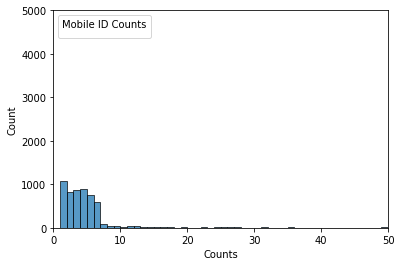

In [8]:
plt.figure()
plt.axis([0, 50, 0, 5000])
h=sns.histplot(data=df_mID, x="Counts", binwidth=1, multiple="stack")
plt.legend(title='Mobile ID Counts', loc='upper left')
plt.show(h)
